In [3]:
%matplotlib inline
import xarray as xr
import proc_cesm_le
from config_calc import *

tr85 = proc_cesm_le.open_ens('tr85','ann_dft',['O2','TEMP'])

gridvar = [k for k in tr85 if 'time' not in tr85[k].dims]
timevar = [k for k in tr85 if 'time' in tr85[k].dims]

grid = tr85.isel(ens=0).drop(timevar)
print grid

tr85 = tr85.drop(gridvar)
tr85 = (tr85 * grid.dz).sum(dim='z_t')
print tr85

<xarray.Dataset>
Dimensions:               (lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                   (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 ...
    ULAT                  (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 ...
    ULONG                 (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 ...
  * lat_aux_grid          (lat_aux_grid) float32 -79.4882 -78.9529 -78.4187 ...
  * moc_z                 (moc_z) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_t_150m              (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 ...
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_top               (z_w_top) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
    TLAT                  (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 ...
    

In [4]:
tr85a = tr85.mean(dim='ens')
tr85a = tr85a.where(grid.KMT>0)
tr85a

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 182)
Coordinates:
  * time        (time) float64 7.01e+05 7.01e+05 7.014e+05 7.017e+05 ...
    ULAT        (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG       (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 326.8 ...
    TLAT        (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG       (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    O2          (time, nlat, nlon) float64 nan nan nan nan nan nan nan nan ...
    time_bound  (time, d2, nlat, nlon) float64 nan nan nan nan nan nan nan ...
    year        (time, nlat, nlon) float64 nan nan nan nan nan nan nan nan ...
    TEMP        (time, nlat, nlon) float64 nan nan nan nan nan nan nan nan ...

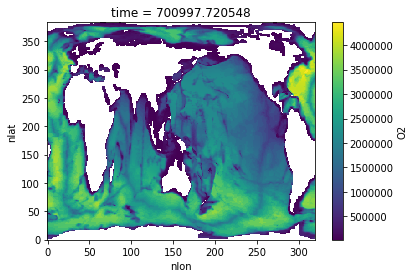

In [5]:
tr85a.O2[0,:,:].plot()

In [19]:
units = 'kmol O$_2$ m$^{-2}$'
field = tr85a.O2.values[0,:,:]
field = field *1e-9*1e4*1e-3
lon = grid.TLONG.values
lat = grid.TLAT.values
print field.shape
print np.nanmin(field)
print np.nanmax(field)

lon,lat,z= plot_tools.adjust_pop_grid(lon,lat,field)

(384, 320)
0.000176401838823
0.0446778558368


[ 0.    0.01  0.02  0.03  0.04]


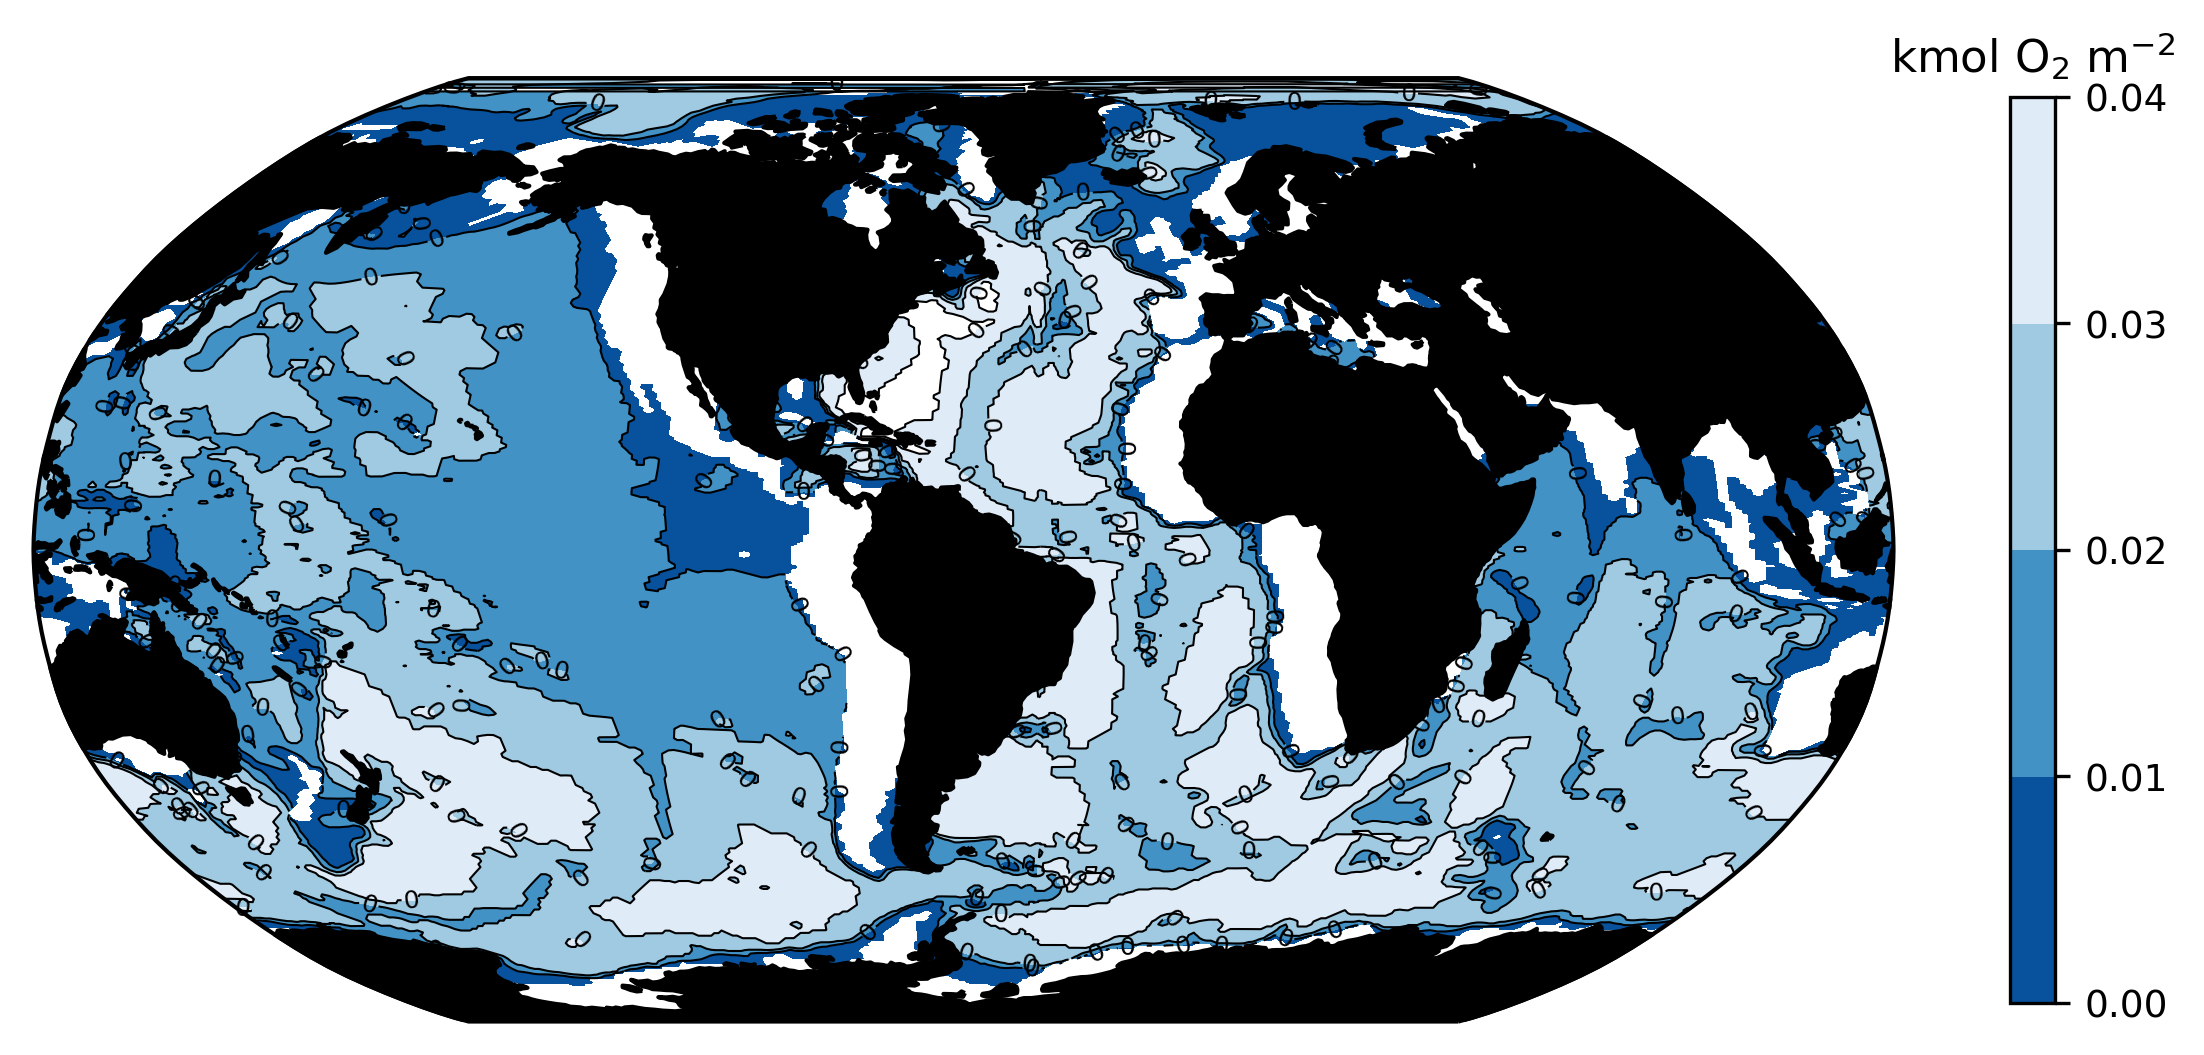

In [18]:
import plot_tools
cmap = 'Blues_r'
levels = np.arange(0.,0.05,0.01)
print levels



plot_name = os.path.join(diro['fig'],'cesm-column-int-o2.pdf')
plot_tools.plot_map_contour_overlay(lon,lat,z,levels,cmap,units,plot_name)
